In [22]:
from  sklearn import datasets 
import pandas as pd 
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
boston = datasets.load_boston()

In [3]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['price'] = boston.target

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
y = data.pop('price')
X = data

In [6]:
data_matrix = xgb.DMatrix(data,y)

In [7]:
xg_reg= xgb.XGBRegressor(
    objective='reg:linear',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=10,
    reg_alpha=10
)

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.25)
xg_reg.fit(train_X,train_y)

[17:39:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [9]:
pred = xg_reg.predict(test_X)

In [10]:
mean_squared_error(pred,test_y)

123.63933576796803

In [11]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680257,0.025607,21.719121,0.019025
1,19.740500,0.072068,19.818879,0.061769
2,18.007202,0.119744,18.109862,0.129375
3,16.463925,0.115087,16.587235,0.182339
4,14.990313,0.112001,15.132976,0.166282


In [13]:
xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=10)


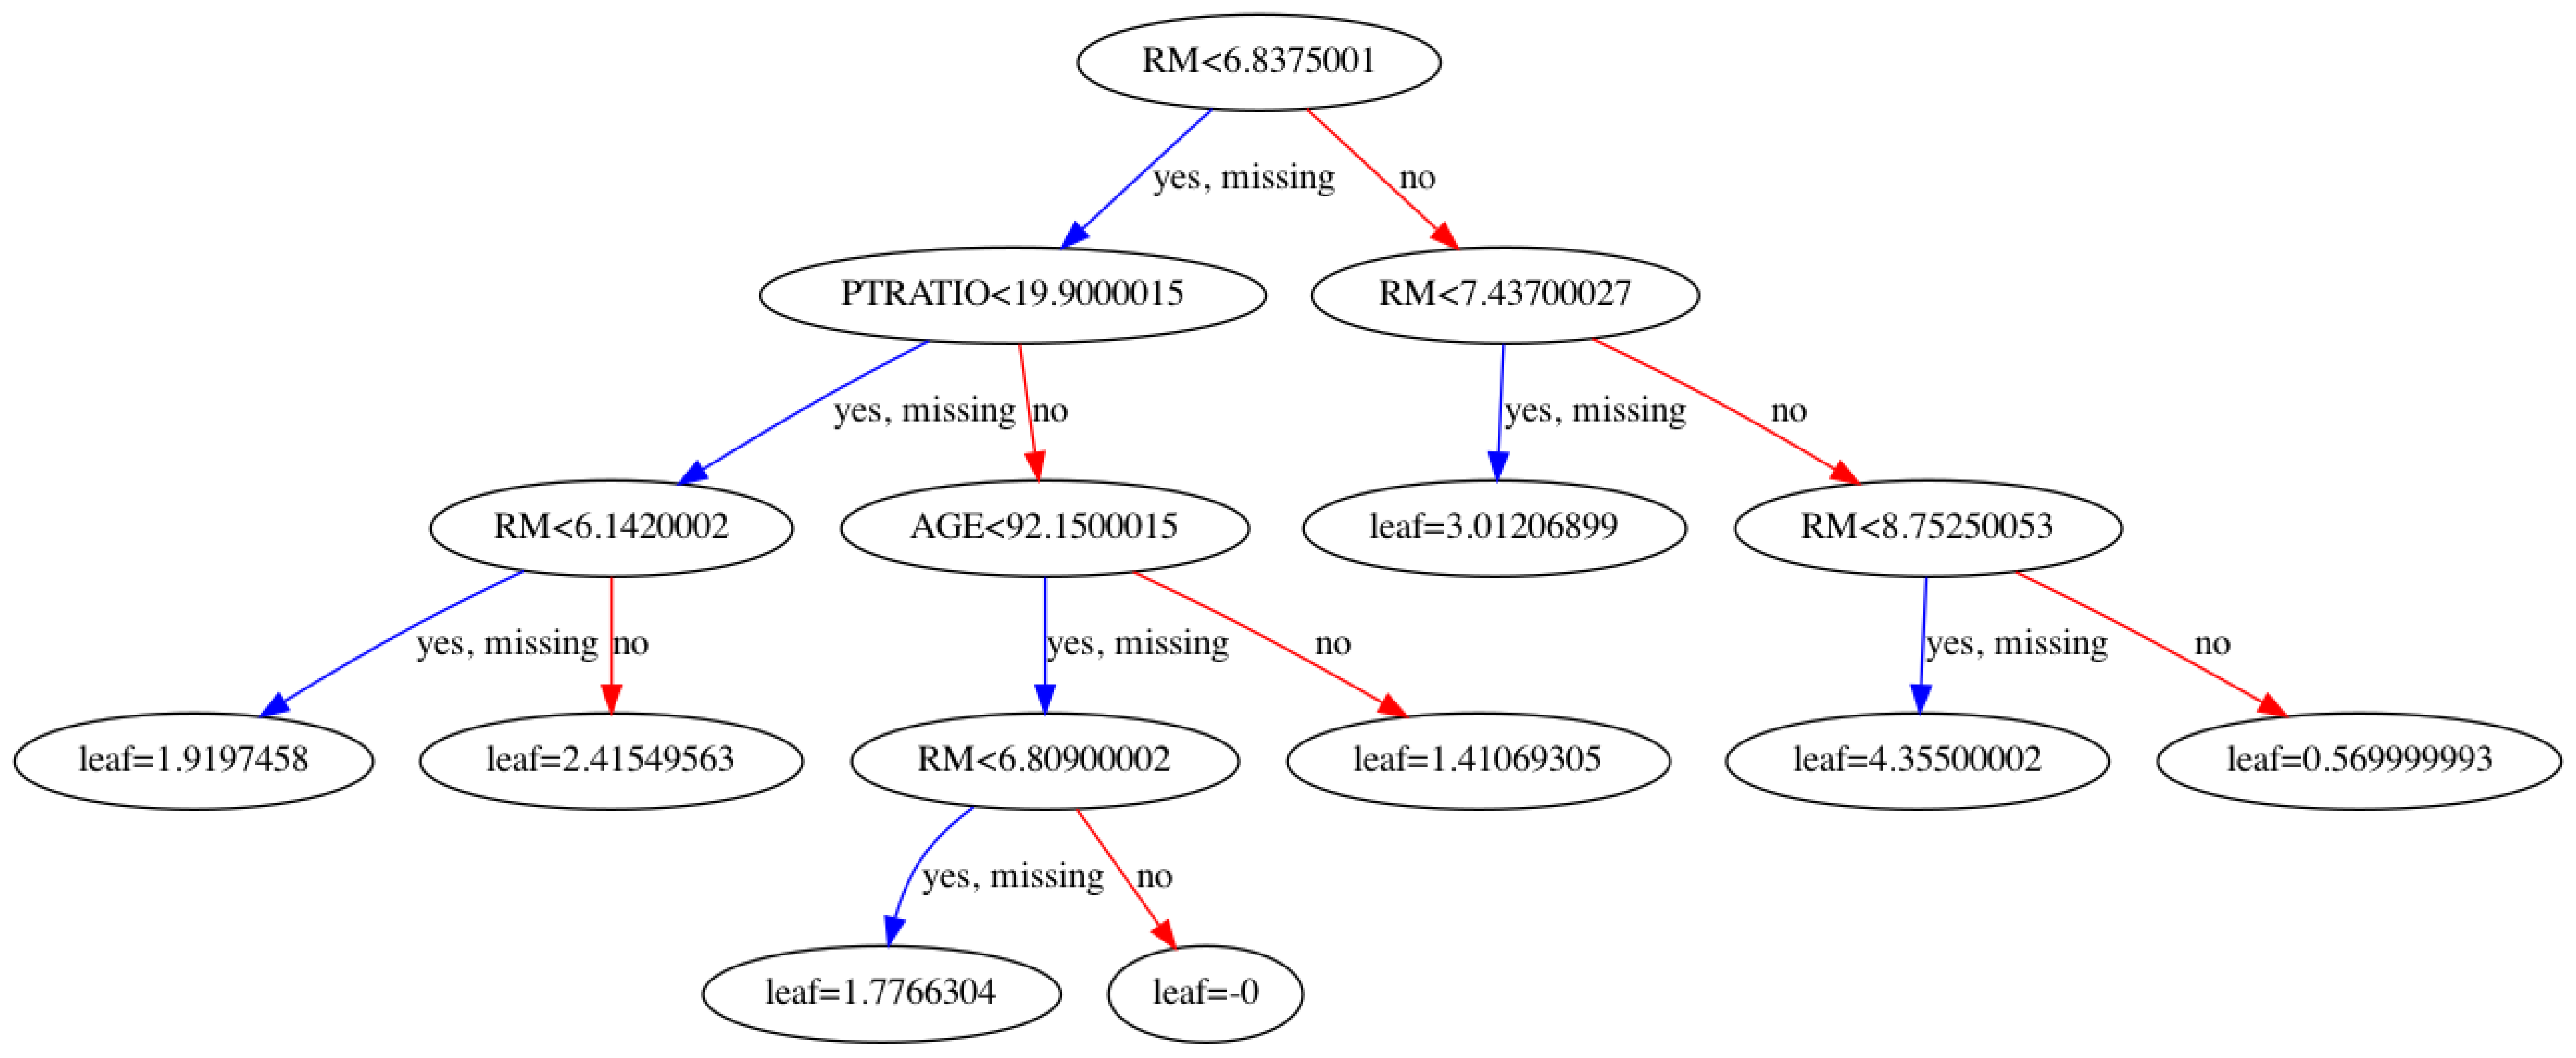

In [17]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [80, 60]
plt.show()

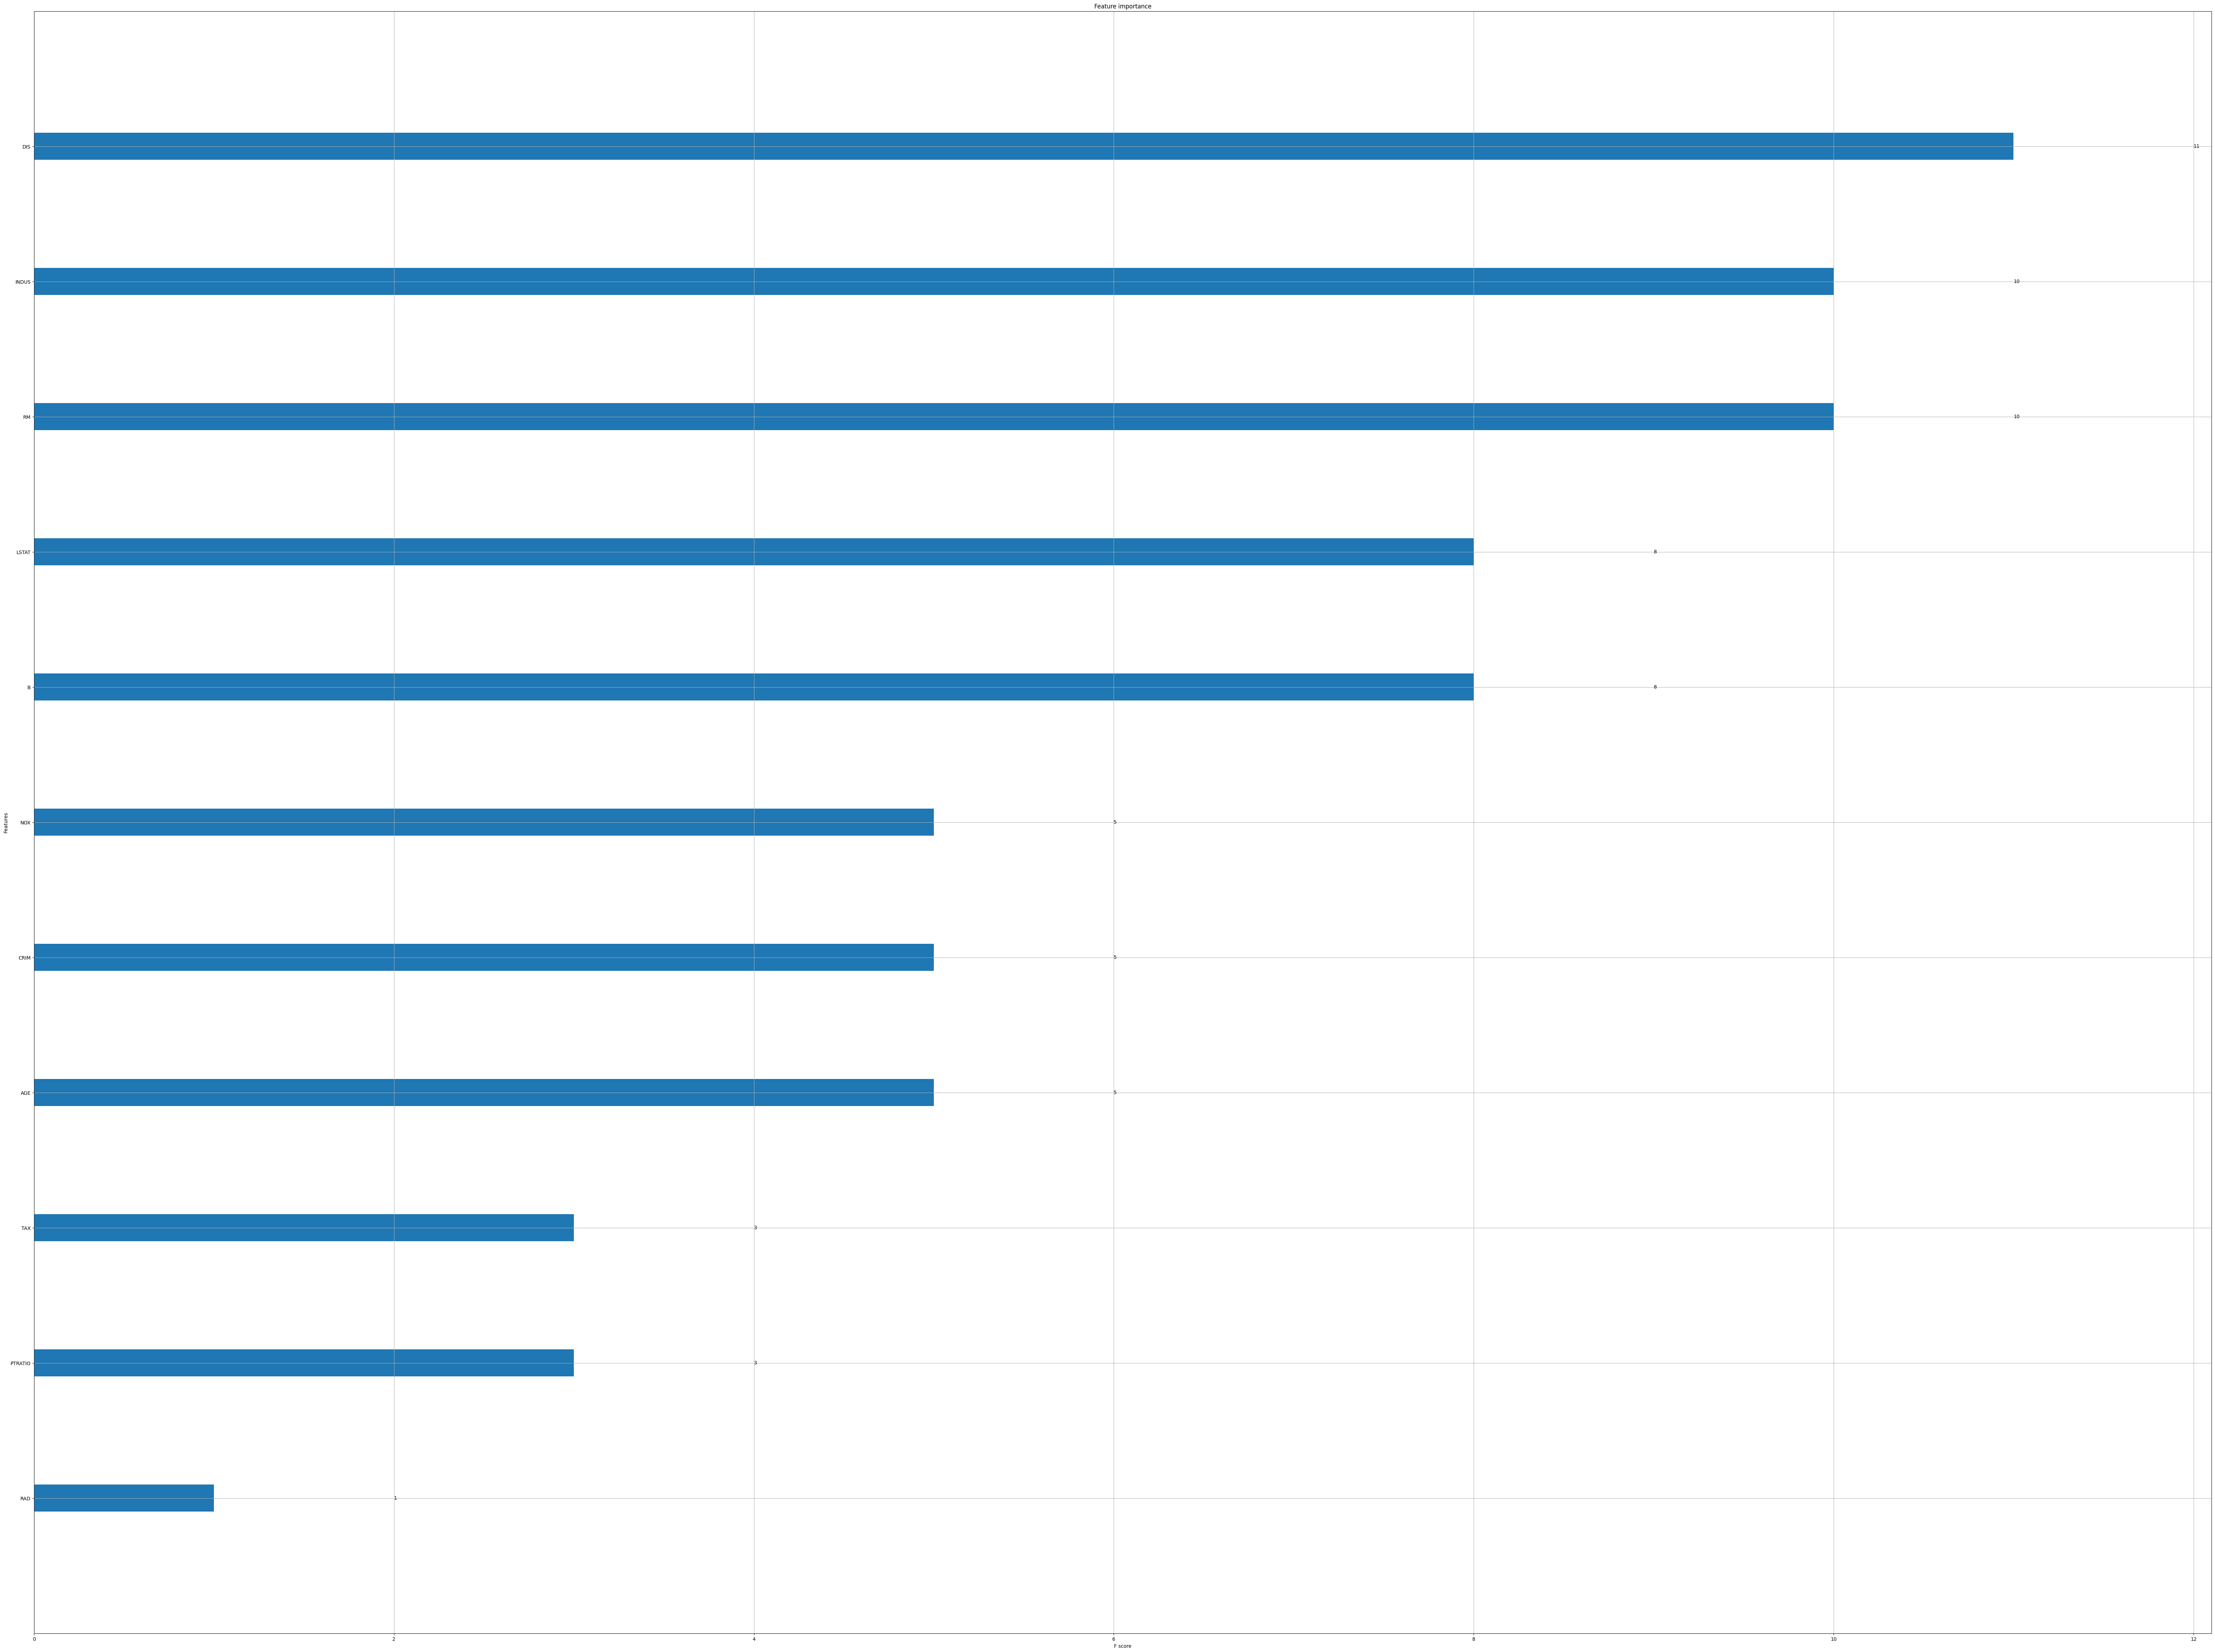

In [19]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [20]:
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
params = {'learning_rate': 0.1, 'n_estimators': 500, 
          'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
          'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 
          'reg_alpha': 0, 'reg_lambda': 1}


In [24]:
model = xgb.XGBRegressor(**params)
optimized_GBM = GridSearchCV(estimator=model, 
                             param_grid=cv_params, 
                             scoring='r2', 
                             cv=5, 
                             verbose=1,
                             n_jobs=4)
optimized_GBM.fit(train_X, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=500, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=None, seed=0,
                                    subsample=0.8, tree_method=None,
                       

In [29]:
optimized_GBM.cv_results_

{'mean_fit_time': array([2.32385707, 2.94065881, 3.60098491, 4.30437799, 3.85195518]),
 'std_fit_time': array([0.02836804, 0.03397631, 0.14128794, 0.02411412, 0.94540912]),
 'mean_score_time': array([0.00364718, 0.00328817, 0.00337071, 0.00358763, 0.00329742]),
 'std_score_time': array([0.00024729, 0.000119  , 0.00017513, 0.00018491, 0.00023211]),
 'param_n_estimators': masked_array(data=[400, 500, 600, 700, 800],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 400},
  {'n_estimators': 500},
  {'n_estimators': 600},
  {'n_estimators': 700},
  {'n_estimators': 800}],
 'split0_test_score': array([0.80757477, 0.80751993, 0.80750508, 0.80749915, 0.80750084]),
 'split1_test_score': array([0.85355437, 0.8535399 , 0.85351866, 0.8535047 , 0.85350511]),
 'split2_test_score': array([0.89663074, 0.89662557, 0.89661447, 0.89661646, 0.89661682]),
 'split3_test_score': array([0.9182618 , 0.91821655, 0.91822861, 

In [30]:
optimized_GBM.best_params_

{'n_estimators': 400}